# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Loading Data

In [2]:
raw_data = pd.read_excel('Dataset1 .xlsx')
raw_data.sample(5)

,emg1,emg2,emg3,emg4,emg5,emg6,emg7,emg8,emg9,emg10,repetition,rerepetition,stimulus,restimulus
76197,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0049,0.0488,0.0024,0.0024,1,1,10,10
78844,0.0098,0.0024,0.0024,0.0024,0.0024,0.0024,0.0684,0.0708,0.0024,0.0122,4,0,10,0
6041,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0439,0.0293,0.0024,0.0024,0,0,0,0
33833,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0342,0.0366,0.0195,0.0098,0,0,0,0
77857,0.0293,0.0024,0.0024,0.0024,0.0024,0.0024,0.0220,0.1440,0.0024,0.0122,3,0,10,0


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101014 entries, 0 to 101013
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   emg1          101014 non-null  float64
 1   emg2          101014 non-null  float64
 2   emg3          101014 non-null  float64
 3   emg4          101014 non-null  float64
 4   emg5          101014 non-null  float64
 5   emg6          101014 non-null  float64
 6   emg7          101014 non-null  float64
 7   emg8          101014 non-null  float64
 8   emg9          101014 non-null  float64
 9   emg10         101014 non-null  float64
 10  repetition    101014 non-null  int64  
 11  rerepetition  101014 non-null  int64  
 12  stimulus      101014 non-null  int64  
 13  restimulus    101014 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 10.8 MB


In [4]:
raw_data.describe(include='all')

,emg1,emg2,emg3,emg4,emg5,emg6,emg7,emg8,emg9,emg10,repetition,rerepetition,stimulus,restimulus
count,101014.000000,101014.000000,101014.000000,101014.000000,101014.000000,101014.000000,101014.000000,101014.000000,101014.000000,101014.000000,101014.000000,101014.000000,101014.000000,101014.000000
mean,0.039693,0.086158,0.041308,0.012502,0.003868,0.005367,0.167648,0.116476,0.073460,0.054120,3.372948,2.055349,3.985665,2.329905
std,0.127180,0.231539,0.101912,0.031334,0.009796,0.021238,0.403823,0.174862,0.156381,0.112567,3.497555,3.188164,4.162080,3.691976
min,0.002400,0.000000,0.002400,0.000000,0.002400,0.000000,0.002400,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.009800,0.039100,0.002400,0.004900,0.000000,0.000000,0.000000,0.000000
50%,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.046400,0.061000,0.002400,0.017100,2.000000,0.000000,3.000000,0.000000
75%,0.024400,0.002400,0.012200,0.002400,0.002400,0.002400,0.129400,0.109900,0.068400,0.048800,6.000000,4.000000,8.000000,4.000000
max,2.399900,2.480500,1.340300,0.446800,0.293000,0.639600,4.660600,3.000500,1.752900,1.599100,10.000000,10.000000,12.000000,12.000000


In [5]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     39063
2      5174
4      5173
5      5173
12     5173
8      5172
7      5171
6      5170
11     5166
3      5158
1      5149
10     5137
9      5135
Name: stimulus, dtype: int64


# Data Cleaning

In [6]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [7]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [8]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# Applying Simple Deeplearning Model

In [9]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from tensorflow.keras import activations

# One Hot Encoding

In [10]:
num_classes = 13

In [11]:
# One hot encoding for categorical labels
import keras
y = keras.utils.to_categorical(y, num_classes)

In [12]:
# build the model
input_dim = X.shape[1]

In [13]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 39)

# 1. Define Network

In [14]:
visible = Input(shape=(input_dim,))
hidden1 = Dense(10, activation='relu')(visible)
hidden2 = Dense(20, activation='relu')(hidden1)
hidden3 = Dense(10, activation='relu')(hidden2)
output = Dense(num_classes, activation='softmax')(hidden3)
model = Model(inputs=visible, outputs=output)

In [15]:
# summarize layers
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense (Dense)                (None, 10)                110       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 13)                143       
Total params: 683
Trainable params: 683
Non-trainable params: 0
_________________________________________________________________


# 2. Compile Network

In [16]:
model.compile(optimizer='Adam', loss='mean_squared_error', metrics=['accuracy'])

# 3. Fit Network

In [17]:
history = model.fit(X_train, y_train, batch_size=10, epochs=15)

Epoch 1/15
6004/6004 [==============================] - 6s 1ms/step - loss: 0.0366 - accuracy: 0.6440
Epoch 2/15
6004/6004 [==============================] - 6s 939us/step - loss: 0.0280 - accuracy: 0.7495
Epoch 3/15
6004/6004 [==============================] - 6s 972us/step - loss: 0.0251 - accuracy: 0.7830
Epoch 4/15
6004/6004 [==============================] - 6s 1ms/step - loss: 0.0238 - accuracy: 0.7933
Epoch 5/15
6004/6004 [==============================] - 7s 1ms/step - loss: 0.0231 - accuracy: 0.8009
Epoch 6/15
6004/6004 [==============================] - 7s 1ms/step - loss: 0.0225 - accuracy: 0.8067
Epoch 7/15
6004/6004 [==============================] - 6s 1ms/step - loss: 0.0219 - accuracy: 0.8130
Epoch 8/15
6004/6004 [==============================] - 6s 1ms/step - loss: 0.0214 - accuracy: 0.8176
Epoch 9/15
6004/6004 [==============================] - 6s 1ms/step - loss: 0.0211 - accuracy: 0.8206
Epoch 10/15
6004/6004 [==============================] - 7s 1ms/step - loss: 0

In [18]:
model.save('final_model.h5')

In [19]:
from keras.models import load_model
model = load_model('final_model.h5')

# 4. Evaluate Network

In [20]:
loss, accuracy = model.evaluate(X_test, y_test)

470/470 [==============================] - 0s 709us/step - loss: 0.0197 - accuracy: 0.8336


# 5. Make Predictions

In [21]:
predictions = model.predict(X_test)

In [22]:
predictions

array([[9.1185123e-01, 2.5271906e-03, 6.7708583e-10, ..., 9.9560944e-03,
        6.0154637e-04, 3.3288922e-02],
       [3.2452164e-30, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        3.5436323e-01, 4.2408013e-12],
       [8.9460129e-01, 1.6379865e-02, 7.5787052e-06, ..., 3.3820353e-02,
        1.5008663e-04, 4.2048588e-02],
       ...,
       [9.7023374e-01, 9.3483264e-03, 2.3667206e-04, ..., 1.0087222e-02,
        6.2356858e-06, 7.5373165e-03],
       [1.2013096e-02, 9.3862844e-01, 3.3319052e-06, ..., 9.7127835e-04,
        6.8598332e-05, 1.1623577e-02],
       [1.2720523e-11, 2.2566565e-24, 0.0000000e+00, ..., 0.0000000e+00,
        1.9419643e-01, 3.2932398e-08]], dtype=float32)

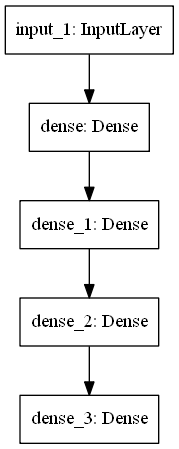

In [23]:
# plot graph
from keras.utils import plot_model
plot_model(model, to_file='multilayer_perceptron_graph.png')